# 0.Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

# 3.Data Explore

In [3]:
df = pd.read_csv("../data/imdb_clean.csv")
df.head()

,Name,Date,Rate,Votes,Genre,Duration,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,PG-13,2,3,2,2,3
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,R,1,1,4,1,3
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,R,3,4,4,3,3
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,PG-13,1,3,3,2,3
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,PG-13,1,3,1,2,3


## 3.1 Rate and Date

<Axes: title={'center': 'Average Rate by Year'}, xlabel='Date', ylabel='Rate'>

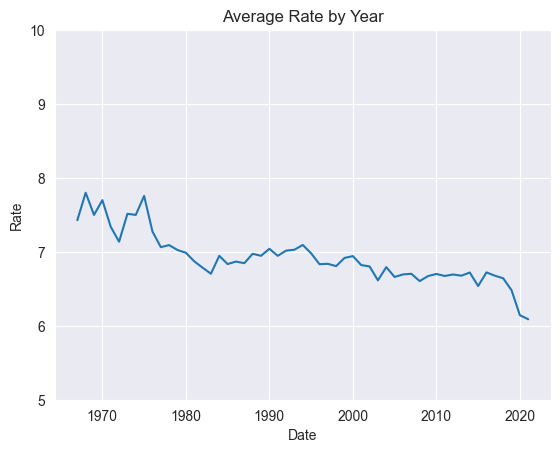

In [ ]:
df.groupby("Date")["Rate"].mean().plot(ylabel="Rate", title="Average Rate by Year",ylim=(5,10))

- Điểm đánh giá trung bình các phim có xu hướng giảm xuống theo thời gian.
- Lí do có thể là tiêu chí đánh giá phim ngày một khắt khe hơn, người xem đang ngày một khó tính hơn, hoặc ngày càng có nhiều phim được sản xuất với chất lượng được đánh giá thấp.
- Điểm đánh giá trung bình cho từng nhãn phim sẽ được làm rõ hơn ở phần 3.5.

## 3.2 Rate and Votes

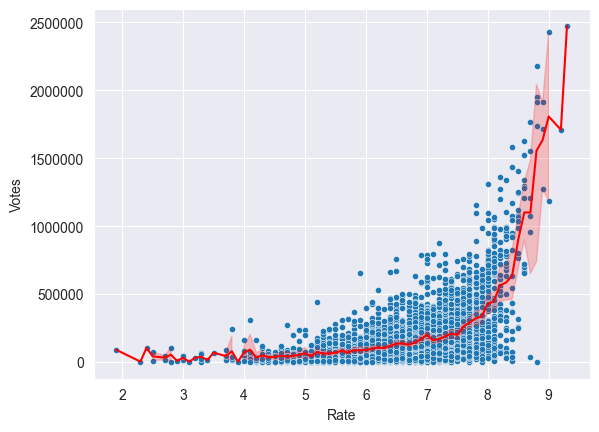

In [44]:
sns.scatterplot(x="Rate",y="Votes", data=df,s=20)
sns.lineplot(x="Rate",y="Votes", data=df, color="red").ticklabel_format(style='plain', axis='y')

- Biểu đồ thể hiện số lượng bình chọn của khán giả với mỗi phim.
- Những phim đạt điểm cao đến rất cao có rất nhiều lượng bình chọn, chứng tỏ rằng phim đó thực sự là bộ phim hay và rất được lòng đại chúng.
- Những phim có điểm thấp và trung bình thấp được ít lượt bình chọn hơn rõ rệt, cho thấy khán khả không mặn mà với những phim được đánh giá không cao, phần lớn chỉ xem và không đưa ra lượt đánh giá nào.

## 3.3 Rate and Duration

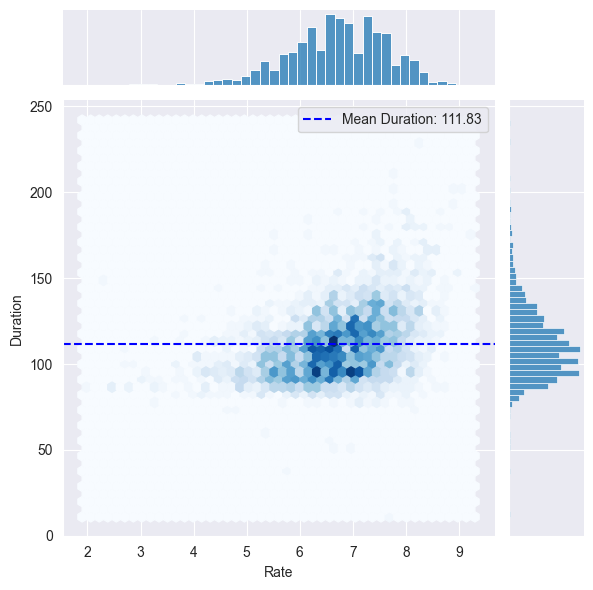

In [137]:
ax=sns.jointplot(x="Rate",y="Duration", data=df, kind="hex",cmap="Blues")
mean_duration=df["Duration"].mean()

ax.ax_joint.axhline(mean_duration, color='blue', linestyle='--', label=f"Mean Duration: {mean_duration:.2f}")
ax.ax_joint.legend()

- Biểu đồ thể hiện sự phân bố của thời lượng phim theo điểm đánh giá.
- Phần lớn phim được sản xuất có thời lượng từ `90 phút` đến dưới `150 phút` (trung bình tổng thể là khoảng `111 phút`), ở mức thời lượng này có mức đánh giá khá từ `6.0` đến `7.0`. Có lẽ khoảng thời lượng này là thời lượng hợp lí, không quá dài dòng và đủ để truyền tải được thông điệp cho khán giả.
- Một số phim có thời lượng lớn hơn (từ trên `150 phút`) có điểm đánh giá cũng cao hơn mức trung bình (ở mức `7.0` đến `9.0`) tuy nhiên số lượng là không nhiều .

## 3.4 Rate and Certificate

Text(0.5, 1.0, 'Average Rate by Certificate')

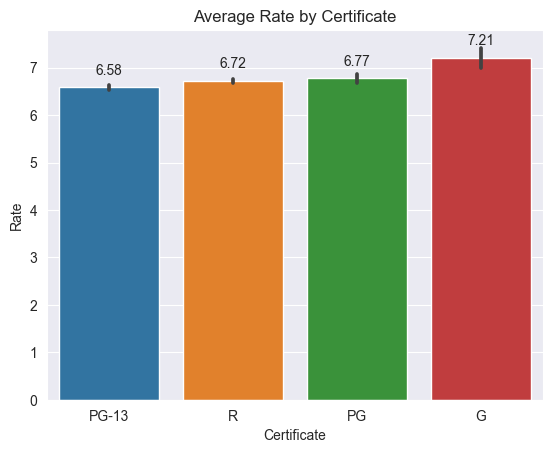

In [129]:
ax=sns.barplot(data=df,x="Certificate",y="Rate")
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge",padding=7)
ax.set_title("Average Rate by Certificate")

- Điểm đánh giá trung bình của các thể loại phim chênh lệch nhau không nhiều. Các phim nhãn PG-13, R và PG có điểm đánh giá trung bình gần như ngang nhau, riêng phim có nhãn R có điểm trung bình cao hơn một chút (khoảng 7.21 điểm)

## 3.5 Rate, Date and Certificate

Text(0.5, 0, '')

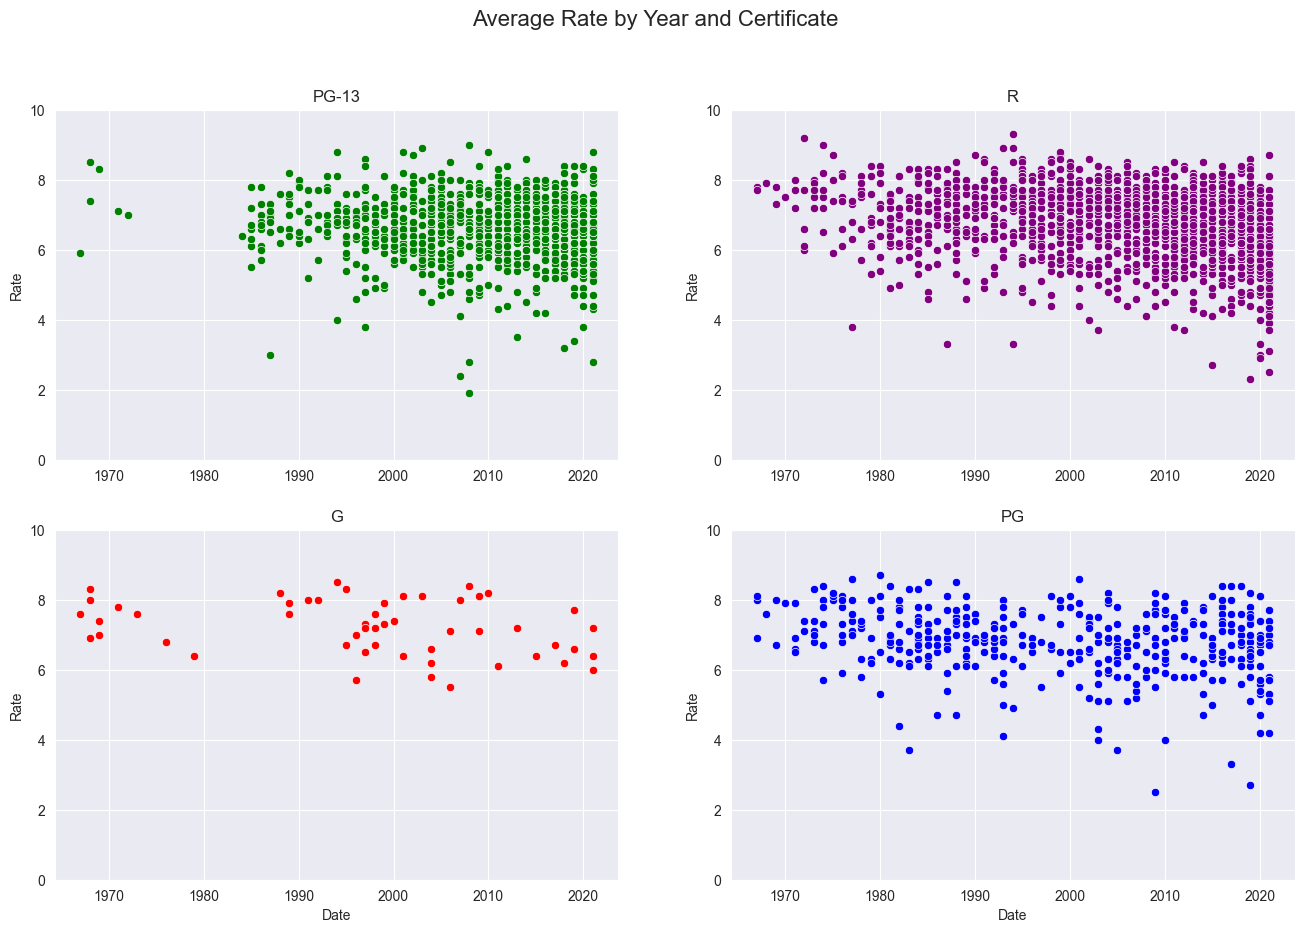

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Average Rate by Year and Certificate', fontsize=16)

sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG-13"], ax=axes[0,0],color="green")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="R"], ax=axes[0,1],color="purple")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="G"], ax=axes[1,0],color="red")
sns.scatterplot(x="Date",y="Rate", data=df[df["Certificate"]=="PG"], ax=axes[1,1],color="blue")

axes[0,0].set_title("PG-13")
axes[0,1].set_title("R")
axes[1,0].set_title("G")
axes[1,1].set_title("PG")

axes[0,0].set_ylim(0,10)
axes[0,1].set_ylim(0,10)
axes[1,0].set_ylim(0,10)
axes[1,1].set_ylim(0,10)

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')


- Biểu đồ phân bố điểm đánh giá của từng phim theo các năm, được chia thành 4 loại nhãn (`PG-13`, `R`, `G`, `PG`).
- Dễ dàng nhận thấy số lượng phim `PG-13` (không khuyến khích cho trẻ dưới 13 tuổi) và phim `R` (không khuyến khích cho trẻ dưới 17 tuổi) có số lượng nhiều hơn hẳn so với các phim có nhãn `G` (dành cho mọi lứa tuổi) và `PG` (cân nhắc cho trẻ em). Cho thấy trẻ em ít được các nhà làm phim nhắm tới là đối tượng dành cho phim của mình.
- Nhìn vào biểu đồ của 2 nhãn phim phổ biến là `PG-13` và `R`, ta thấy càng về những năm gần đây, sự phân bố phim theo trục tung (điểm đánh giá) đang có xu hướng đồng đều và trải rộng ra hơn và số phim có điểm đánh giá cao vẫn duy trì ổn định. Có nghĩa là số luọng phim tăng theo các năm dẫn đến số lượng các phim đạt điểm thấp cũng tăng theo, làm điểm trung bình của các bộ phim trong năm đó bị giảm xuống, điều này cũng giải thích cho biểu đồ ở phần 3.1.

Text(0.5, 1.0, 'Average Rate by Year and Certificate')

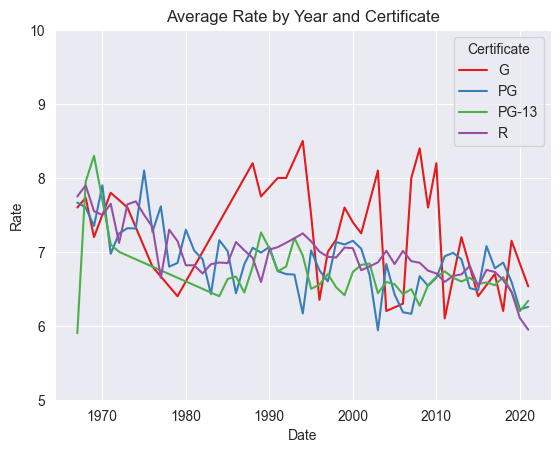

In [125]:
ax=sns.lineplot(x="Date",y="Rate",data=df.groupby(["Date","Certificate"])["Rate"].mean().to_frame(),hue="Certificate",palette="Set1")
ax.set_ylim(5,10)
ax.set_title("Average Rate by Year and Certificate")

- Biểu đồ thể hiện điểm đánh giá trung bình của từng thể loại theo thời gian.
- Điểm đánh giá trung bình của phim nhãn `G` không ổn định, một phần lí do có lẽ vì số lượng quá ít.
- Điểm trung bình của 3 loại nhãn còn lại có xu hướng giảm dần theo thời gian.

## 3.6 Date, Rate and Votes

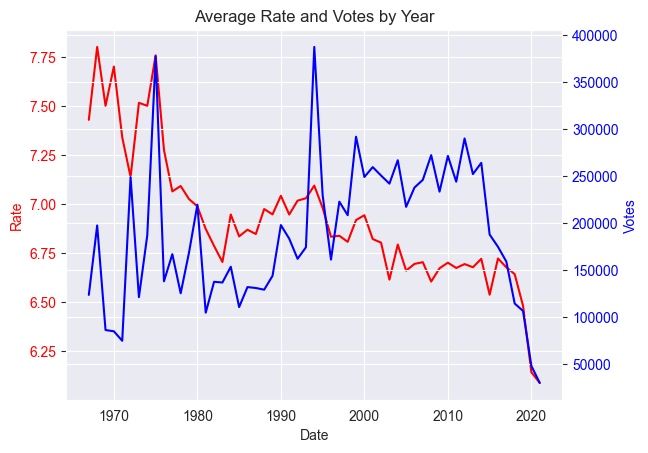

In [140]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Votes"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Votes by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Votes", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Votes', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Biểu đồ thể hiện điểm trung bình và số lượng bình chọn trung bình theo các năm.
- Như đã nói trên, điểm đánh giá đang có xu hướng giảm, ngược lại là số lượng bình chọn thì lại có xu hướng tăng.
- Tuy nhiên những năm gần đây cho thấy sự tụt giảm về cả điểm đánh giá và lượt bình chọn, đó là khoảng thời gian từ Covid-19 đến nay cho thấy đại dịch đã ảnh hưởng không nhỏ đến ngành điện ảnh.

## 3.7 Date, Rate and Duration

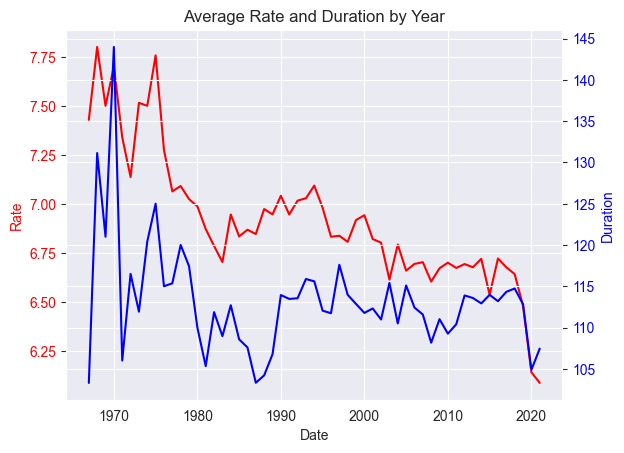

In [141]:
fig, ax1 = plt.subplots()

df1=df.groupby("Date")["Rate"].mean().to_frame()
df2=df.groupby("Date")["Duration"].mean().to_frame()

ax1=sns.lineplot(x="Date",y="Rate", data=df1, color="red", ax=ax1)
ax1.set_ylabel('Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title("Average Rate and Duration by Year")

ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="Duration", data=df2, color="blue", ax=ax2)
ax2.set_ylabel('Duration', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


- Biểu đồ diễn tả mối liên hệ giữa điểm đánh giá trung bình và thời lượng trung bình qua các năm.
- Hai đường này có xu hướng khá giống nhau, có thể nói có sự tương quan với nhau. Từ đó nhóm có nhận xét thời lượng phim có ảnh hưởng đến điểm đánh giá của phim.